`Weronika Sadzik`

`Procesy stochastyczne`

`Symulacja nr 2`

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(13)

## Błądzenie losowe

**Definicja**

Niech $X_1, X_2,\ldots$ będą niezależnymi zmiennymi losowymi o tym samym rozkładzie takim, że

$$P(X_1=1) = p  \;\;\;\; \text{oraz} \;\;\;\; P(X_1=-1) = 1-p$$.

Ciąg zmiennych losowych $\{S_n\}_{n=1}^{\infty}$ zdefiniowany jako $S_n = \sum_{k=1}^n X_k$ nazywamy błądzeniem losowym.

**Parametry**

- $p\in (0, 1)$ - prawdopodobieństwo, z jakim proces błądzenia losowego wybiera krok w przód (o wartości 1) w każdym pojedynczym ruchu

- $\text{n_steps} \in \mathbb{N}_+$ - liczba kroków, które ma wykonać proces błądzenia losowego

- $\text{start_position}$ - początkowa pozycja błądzenia losowego przed rozpoczęciem symulacji.

In [2]:
def simulate_random_walk(p, n_steps, start_position):
    try:
        steps = np.random.choice([-1, 1], size=n_steps, p=[1-p, p])
    except ValueError:
        print("Provide acceptable parameters!")
        return
    positions = np.cumsum(steps)
    return positions

In [3]:
def mc_and_plot_random_walk(p, n_steps, start_position, n_simulations):
    simulations_rw = np.array([simulate_random_walk(p, n_steps, start_position) for _ in range(n_simulations)])
    mean_simulations_rw = np.mean(simulations_rw, axis=0)
    std_simulations_rw = np.std(simulations_rw, axis=0)
    plt.figure(figsize=(14, 5))
    for i in range(15):
        plt.plot(range(n_steps), simulations_rw[i], linewidth=1.5)
    plt.plot(range(n_steps), mean_simulations_rw, color="black", linewidth=2, label="estimated mean function")
    plt.plot(range(n_steps), std_simulations_rw, color="navy", linewidth=2, label="estimated standard deviation function")
    plt.grid()
    plt.title(f"Random walk - 15 trajectories and Monte Carlo estimated mean and std function ($p = {p}$)", fontsize=15)
    plt.legend()
    plt.show()

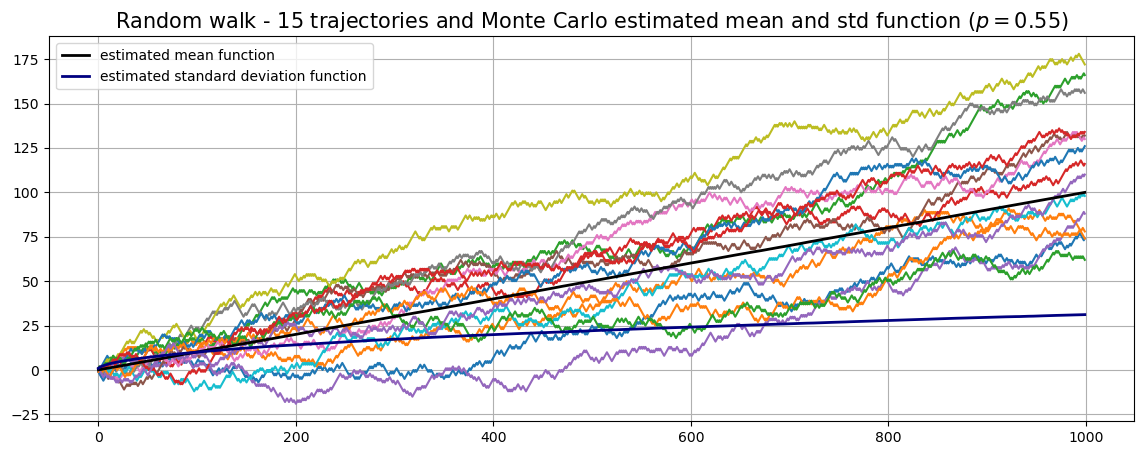

In [4]:
# liczba symulacji MC
n_simulations = 10000

# parametry błądzenia losowego
p = 0.55
n_steps = 1000
start_position = 0

mc_and_plot_random_walk(p, n_steps, start_position, n_simulations)

- **Martyngał**: Proces jest martyngałem, jeśli warunkowa wartość oczekiwana następnego kroku pod warunkiem wszystkich poprzednich kroków oraz obecnej pozycji, 
jest równa obecnej pozycji. Oznacza to brak tendencji w kierunku kroku, czyli prawdopodobieństwo 
$p$ wykonania kroku do przodu oraz do tyłu musi być równe. Dlatego, aby proces losowego spaceru był martyngałem, $p$ powinno wynosić 
$0.5$.

- **Submartyngał**: Proces jest submartyngałem, jeśli warunkowa wartość oczekiwana następnego kroku pod warunkiem wszystkich poprzednich kroków oraz obecnej pozycji, 
jest większa bądź równa obecnej pozycji. Zdarza się to, gdy występuje tendencja do robienia kroku do przodu, czyli prawdopodobieństwo 
$p$ wykonania kroku do przodu musi być wyższe niż prawdopodbieństwo kroku w tył. Dlatego, aby proces losowego spaceru był submartyngałem, $p$ powinno być większe niż
$0.5$.

- **Supermartyngał**: Proces jest supermartyngałem, jeśli warunkowa wartość oczekiwana następnego kroku pod warunkiem wszystkich poprzednich kroków oraz obecnej pozycji, 
jest mniejsza bądź równa obecnej pozycji. Zdarza się to, gdy istnieje tendencja do robienia kroku do tyłu, czyli prawdopodobieństwo 
$p$ wykonania kroku do przodu musi być niższe niż prawdopodobieństwa kroku w tył. Dlatego, aby proces losowego spaceru był supermartyngałem, $p$ powinno być mniejsze niż 
$0.5$.

### Martyngał ($p = 0.5$)

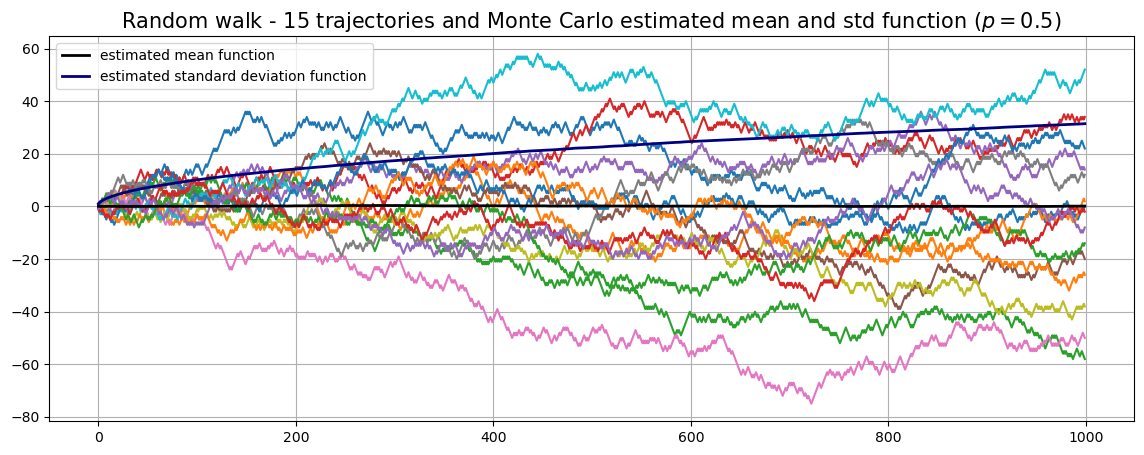

In [5]:
p = 0.5
mc_and_plot_random_walk(p, n_steps, start_position, n_simulations)

### Submartyngał ($p > 0.5$)

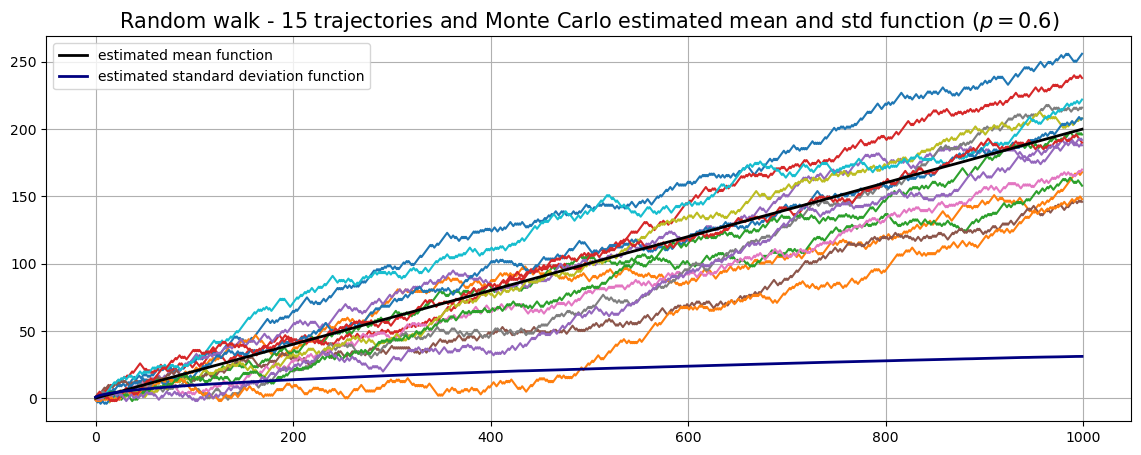

In [6]:
p = 0.6
mc_and_plot_random_walk(p, n_steps, start_position, n_simulations)

### Supermartyngał ($p < 0.5$)

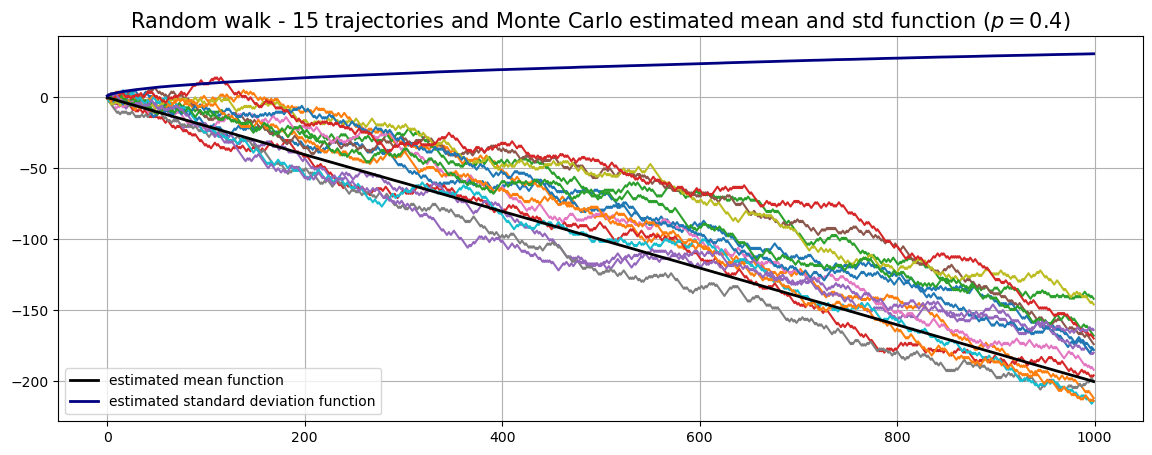

In [7]:
p = 0.4
mc_and_plot_random_walk(p, n_steps, start_position, n_simulations)

Możemy zaobserwować odpowiednią monotoniczność wyestymowanej funkcji średniej dla każdego z typów. Wykres zgadza się również z tezą zadania 7, ponieważ dla martyngału estymowana funkcja jest stała w czasie. Odchylenie standardowe w każdym z przypadków rośnie w czasie, co jest zgodne z teorią błądzenia losowego.

## Proces $Y_n$ z zadania 5

**Definicja**

Niech $X_1, X_2,\ldots$ będą niezależnymi zmiennymi losowymi o tym samym rozkładzie $\mathcal{N}(\mu, 1), \mu\in\mathbb{R}$. Niech $Y_n = exp(h\sum_{k=1}^n X_k)$.

**Parametry**

- $\text{n_steps} \in \mathbb{N}_+$ - liczba kroków, które ma wykonać proces $Y_n$

- $\mu\in\mathbb{R}$ - wartość oczekiwana rozkładu normalnego

- $h \neq 0$ - parametr procesu.

Załóżmy, że $\mu = 0.05$.

In [8]:
def simulate_Yn(n_steps, mu, h):
    X_i = np.random.normal(mu, 1, n_steps)
    cumulative_sum = np.cumsum(X_i)
    Y_n = np.exp(h * cumulative_sum)
    return Y_n

In [16]:
def mc_and_plot_yn(n_steps, mu, h, n_simulations):
    simulations_Yn = np.array([simulate_Yn(n_steps, mu, h) for _ in range(n_simulations)])
    mean_simulations_Yn = np.mean(simulations_Yn, axis=0)
    std_simulations_Yn = np.std(simulations_Yn, axis=0)
    plt.figure(figsize=(14, 5))
    for i in range(15):
        plt.plot(range(n_steps), simulations_Yn[i], linewidth=1.5)
    plt.plot(range(n_steps), mean_simulations_Yn, color="black", linewidth=2, label="estimated mean function")
    plt.plot(range(n_steps), std_simulations_Yn, color="navy", linewidth=2, label="estimated standard deviation function")
    plt.grid()
    plt.title(f"$Y_n$ stochastic process - 15 trajectories and Monte Carlo estimated mean and std function ($h = {h}$)", fontsize=15)
    plt.legend()
    plt.show()

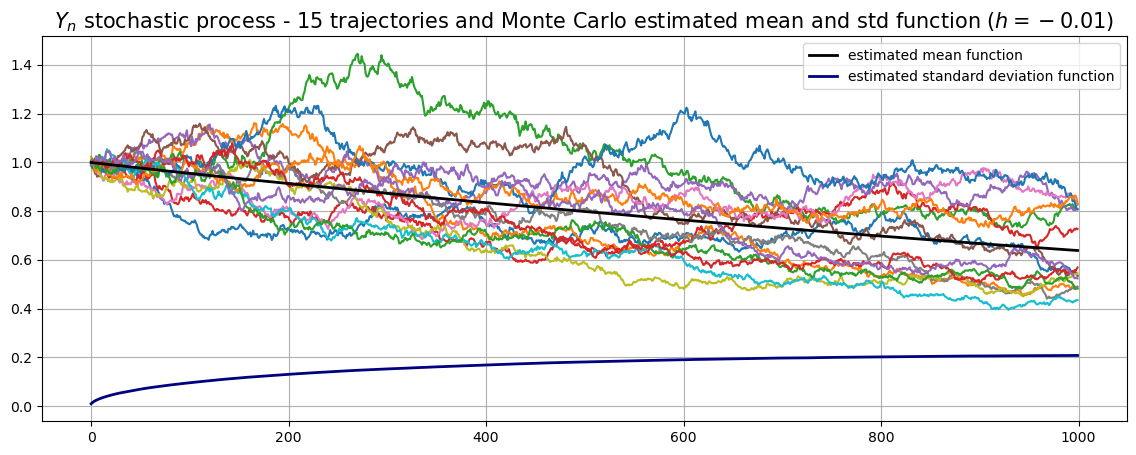

In [10]:
# liczba symulacji MC
n_simulations = 50000

# parametry procesu
mu = 0.05
h = -0.01
n_steps = 1000

mc_and_plot_yn(n_steps, mu, h, n_simulations)

Zgodnie z zadaniem 5 rozwiązanym na ćwiczeniach (bierzemy pod uwagę przypadek $\mu > 0$):

- **Martyngał**: W tym przypadku proces będzie martyngałem tylko, jeżeli $h=0$ (które wykluczamy z dziedziny) lub $h=-2\mu=-0.1$.

- **Submartyngał**: Proces będzie submartyngałem dla $h\in (-\infty,-2\mu)\cup (0,+\infty)$. W naszym przypadku będzie to przedział $(-\infty,-0.1)\cup (0,+\infty)$.

- **Supermartyngał**: Proces będzie supermartyngałem dla $h\in (-2\mu, 0)$. W naszym przypadku będzie to przedział $(-0.1, 0)$.


### Martyngał ($h = -0.1$)

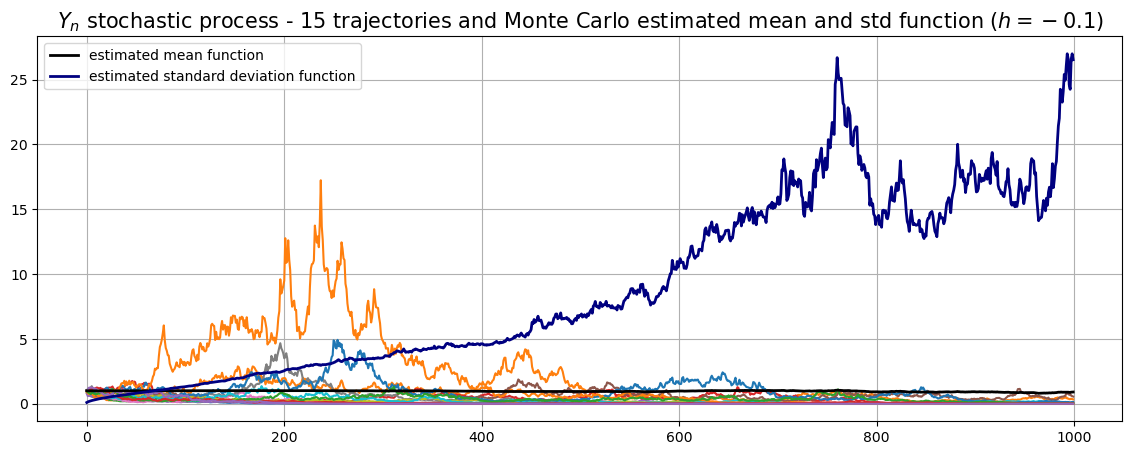

In [17]:
h = -0.1
mc_and_plot_yn(n_steps, mu, h, n_simulations)

### Submartyngał ($h \in (-\infty,-0.1)\cup (0,+\infty)$)

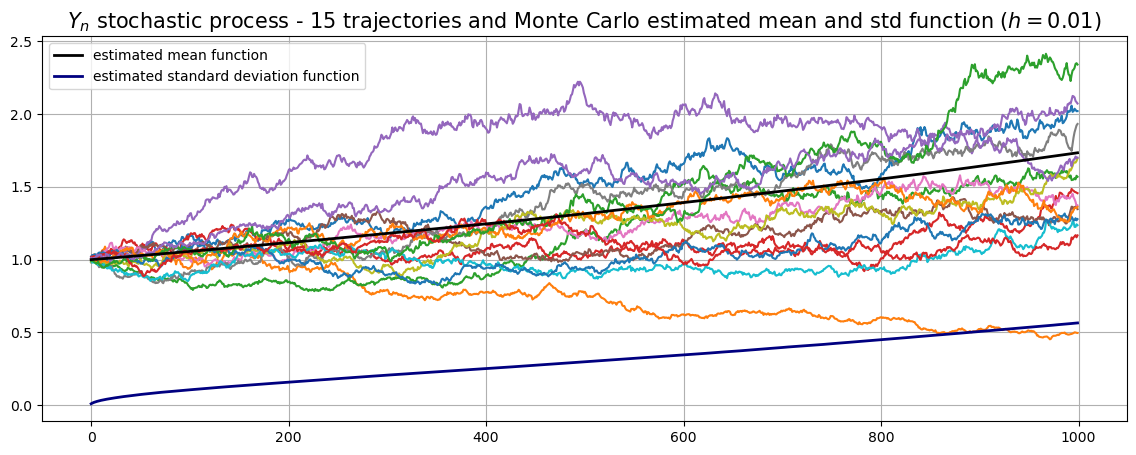

In [12]:
h = 0.01
mc_and_plot_yn(n_steps, mu, h, n_simulations)

### Supermartyngał ($h \in (-0.1, 0)$)

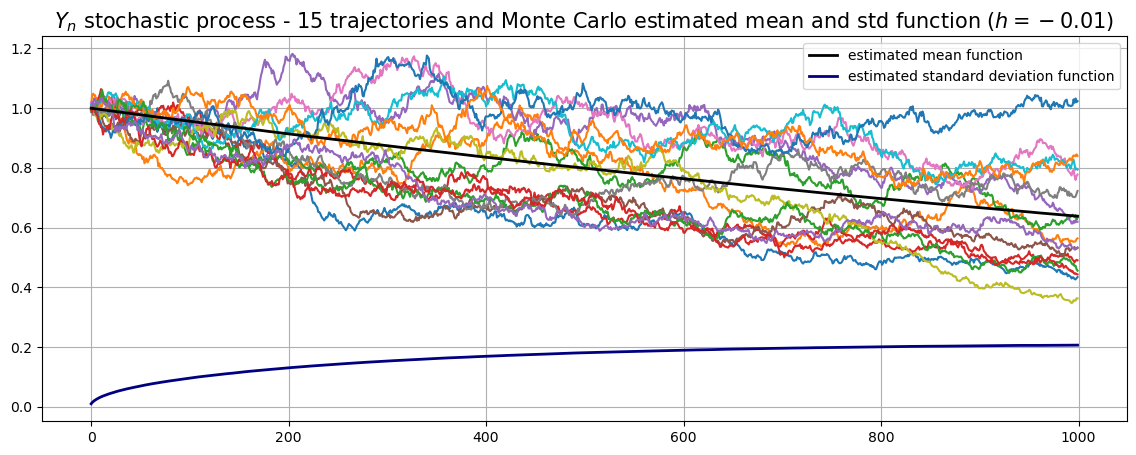

In [13]:
h = -0.01
mc_and_plot_yn(n_steps, mu, h, n_simulations)

Możemy zaobserwować odpowiednią monotoniczność wyestymowanej funkcji średniej dla każdego z typów. Wykres zgadza się również z tezą zadania 7, ponieważ dla martyngału estymowana funkcja jest stała w czasie. Odchylenie standardowe dla sub/super martyngału rośnie w czasie.